# Data Scraping mit Python: Abschluss-Portfolio – Vergleich liberaler und konservativer Zeitungen/Medien in den USA

In diesem Notebook soll eine deskriptiv-explorative, vergleichende Analyse zweier amerikanischer Zeitungen und der Themen, über die dort berichtet wird, durchgeführt werden.

Folgendes Notebook gliedert sich wie folgt:

**1. Hintergrund: welche Medien wurden ausgewählt und auf was zielt die Analyse ab?**

**2. Technische Durchführung, Datenakquise**

**3. Aufbereitung erhaltener Daten und einige explorative Analysen**

**4. Ein kurzes abschließendes Fazit**

## 1. Hintergrund: welche Medien wurden ausgewählt und auf was zielt die Analyse ab?

Zunächst wird geklärt, welches Erkenntnisinteresse diesem Projekt zugrunde liegt – woraus sich nachfolgend auch die Auswahl der beiden Medien ergibt.

Es kann durchaus behauptet werden, dass die US-amerikanische politische Landschaft aktuell ein problematisches Bild abgibt. Gerade der Diskurs um "Fake News", der durch Donald Trumps Präsidentschaft sowie seine haltlosen Bemerkungen, dass ihm ein vermeintlicher Wahlsieg gegen Joe Biden bei der letzten Wahl durch gezielte Manipulation gestohlen worden wäre, trugen dazu bei. Die ohnehin starke Rivalität zwischen den konservativen Republikanern und den liberaleren Demokraten, die durchaus schon vor Trumps Präsidentschaft bestand, wurde jedoch durch eben diese verschärft: man bekommt als außenstehender Europäer immer mehr den Eindruck, es handele sich um regelrechte Grabenkämpfe – eine Metapher, die sich durch die traurigen Ereignisse des Sturms auf das US-Kapitol vom 6. Januar 2021 noch stärker aufdrängt.

Und dieses Bild der amerikanischen Politik lässt sich zu gewissen Teilen sicher auch auf die Medienlandschaft der USA übertragen. So konnte man unter dem letzten Präsidenten wohl einen starken Anstieg in der Wichtigkeit von Blogs und anderen News-Quellen feststellen, mit denen seine Anhänger ihre "alternativen Fakten" einholten.

Doch sind für vorliegendes Portfolio vor allem die traditionellen Printmedien von Interesse, genauer gesagt deren Online-Versionen. Es soll um die Frage gehen, ***welche Themen in diesen behandelt werden und wo zwischen traditionell liberalen und traditionell konservativen Zeitungen bzw. Nachrichtenagenturen Unterschiede bestehen.***

Hier wäre beispielsweise anzunehmen, dass sozusagen aus der "Ideologie" heraus in den konservativen Zeitungen das "America first"-Prinzip vorherrschend ist und daher viel über das Inland berichtet wird. Dem gegenüber könnte angenommen werden, dass in den liberaleren Zeitungen wohl eher die Prämisse eines "offeneren Amerikas" vorherrscht und hier im Gegenteil zu konservativen Zeitungen in Beiträgen auch andere, weniger auf die USA zentrierte Themen Aufmerksamkeit erfahren könnten.

Diese Vermutungen sollen mittels dieses Portfolios einer ersten explorativen Überprüfung unterzogen werden, damit sie durch Fakten untermauert werden können. Als Methode soll hier eine **Wordcloud** erstellt werden, die zeigen wird, welche Begriffe besonders oft in den Artikeln der jeweiligen Medien genutzt werden. Danach wird sich zeigen, ob sich daraus wirklich Rückschlüsse ziehen lassen und ob es Tendenzen wie die gibt, die zuvor beschrieben wurden.

Zwecks der dafür genutzten Medien soll auf der "liberalen Seite" auf die [New York Times](https://www.nytimes.com) zurückgegriffen werden. Als konservatives Gegenstück wurde sich für die [Washington Times](https://www.washingtontimes.com) entschieden. Da gerade in Bezug auf die "Fake News"-Debatte und Trumps Präsidentschaft ein Portal besonders herausstach, wurde auch dieses noch in die Analyse integriert: die Rede ist von [Fox News](https://www.foxnews.com/). Diese Entscheidungen wurden beispielsweise aufgrund von [Rankings der University of Michigan in Zusammenarbeit mit Hilfe von AllSides](https://guides.lib.umich.edu/c.php?g=637508&p=4462444) getroffen.

AllSides ist ein eigenes Nachrichten-Portal, welches wie der Name schon sagt versucht, "beide Seiten" des (nachrichten)politischen Spektrums zu erfassen und somit ein möglichst umfassendes Nachrichtenbild zu gewährleisten. Dort werden Seiten mit einem eigenen [Ranking](https://www.allsides.com/media-bias/media-bias-ratings) erfasst, auf welches von Seiten der University of Michigan und auch von Seiten dieses Portfolios zurückgegriffen wurde.
Es wurde dabei bewusst nur auf die Kategorien "lean left" und "lean right" geblickt, da u. a. auch Nachrichtenagenturen wie Breitbart erfasst wurden, welche von vorliegender Arbeit nicht wirklich als seriöse "traditionelle Nachrichtenquelle" erachtet wird.

# 2. Technische Durchführung, Datenakquise

Im zweiten Schritt sollen dann die Daten von den ausgewählten Medien-APIs gezogen werden. Dieser Paragraph soll kurz als Vorabklärung zu den verwendeten Ressouren dienen - etwaige geschriebene Funktionen werden dann jedoch an Ort und Stelle näher erläutert oder mit ausreichend erklärenden Kommentaren versehen.

Da im Falle der **New York Times** eine äußerst gut dokumentierte API vorliegt, welche auch mittels `requests` gut nutzbar ist - dies jedoch weder für die **Washington Times**, noch für **FoxNews** der Fall war - wurde eine Lösung gesucht, die Ergebnisse liefern kann, welche auf Anhieb eine gute Vergleichbarkeit miteinander haben. Außerdem wurde die Arbeit mittels API gegenüber einem direkten Scraping bevorzugt, da es im Bereich "News" hiervon sehr viele gute Alternativen gibt (z. B. [CurrentsAPI](https://www.currentsapi.services/en), [mediastack](https://mediastack.com/product) oder [NewsAPI](https://newsapi.org/)) und für ein direktes Scraping, besonders im Fall der **Washington Times**, nach einem Blick auf die `robots.txt`-Datei ein Unterlassungswunsch nicht komplett auszuschließen war (siehe [hier](https://washingtontimes.com/robots.txt)).

Es wurde sich am Ende schließlich für die **NewsAPI** entschieden - aus den pragmatischen und einfachen Gründen, dass es erstens für diese ein gut dokumentiertes und einfach anzuwendendes Python-Package gibt (`newsapi`) und zweitens hier mittels einer Abfrage direkt 100 Artikel gezogen werden können.
Von **Currents** wurde dann v. a. aus dem Grund abgesehen, da die Dokumentation im Vergleich zu **NewsAPI** eher mangelhaft ausfiel und nicht genug Informationen entnommen werden konnten, um einen anständigen Paginationsmechanismus zu definieren (sofern dieser bei **Currents** überhaupt möglich wäre).

In [57]:
# basis packages
import requests
import datetime as dt
import pandas as pd
import seaborn as sea
from pprint import pprint
from newsapi import NewsApiClient
import math

# nachher für die datenbearbeitung und die wordcloud
import numpy
import re
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.preprocessing import LabelEncoder
from collections import defaultdict
from nltk.corpus import wordnet as wn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, naive_bayes, svm
from sklearn.metrics import accuracy_score
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
# der apicode für die newsapi; muss in den client eingegeben werden
apicode = NewsApiClient(api_key="24723a0894f94deea8cf83a9efaca4d8")

### 2.1 Funktionen: Anfragen bei API

Nachfolgende Funktionen können zum Anfragen von Artikeln aus bestimmten Domains durch den API-Zugang der NewsAPI genutzt werden. Etwaige Schritte, die erklären, was genau welcher Abschnitt der Funktion tut, können aus den Kommentaren entnommen werden:

In [26]:
def scraper_paginate(domain, sorting):
    
    ## einmal die basisdaten auf grundlage von "domain" nach "sorting" ziehen und die resultate in "resultat" reinkopieren
    ## sorting könnte dabei verändert werden: publishedAt sortiert zeitlich und ist hier angebracht; man kann noch "popularity"
    ## suchen (dann macht aber domain keinen sinn mehr, soweit ich die dokumentation verstehe) oder nach "relevancy" (hier ist
    ## das verbunden mit einer direkten suche über den parameter "q" (für query))
    daten = apicode.get_everything(domains=f"{domain}", sort_by=f"{sorting}", page=1, page_size=100)
    resultat = daten["articles"].copy()
    
    ## oberes seitenlimit festlegen: die totalResults durch 100 (artikel pro seite) teilen und mit ceil sozusagen "aufrunden"
    ## das ergibt dann das maximale seitenlimit; abspeichern in objekt "seiten"
    seiten = math.ceil(daten["totalResults"]/100)
    
    ## for loop für pagination über "seiten"
    for i in range(2, seiten):
        ## erst initialabfrage erneut starten, diesmal ersetzt man für den "page"-parameter das objekt und iteriert
        ## ab seite 2 bis zum maximum (das objekt "seiten", vgl. oben) für 100 objekte pro seite
        new = apicode.get_everything(domains="nytimes.com", sort_by="publishedAt", page=i, page_size=100)
        ## die ergebnisse werden dann einfach mit der extend-methode an die obige artikelliste mit angehängt
        resultat.extend(new['articles'])
    
    ## sozusagen der abschlussparagraph der funktion: ein objekt wird geschaffen, in dem "resultat" als pd.DataFrame
    ## angelegt ist. dann wird darin noch "publishedAt" als datum identifiziert, sollte das später gebraucht werden
    df = pd.DataFrame(resultat)
    df["publishedAt"] = pd.to_datetime(df["publishedAt"])
    return df

In [27]:
# automatisieren des scrapings von newsapi mittels einer eigenen funktion, welche wiederum funktionen aus dem newsapi package
# verwendet
def scraper_newsapi(domain, sorting, page):
    ## apicode eingeben
    apicode = NewsApiClient(api_key="24723a0894f94deea8cf83a9efaca4d8")
    ## get_everything für die parameter der funktion
    data = apicode.get_everything(domains=f"{domain}", sort_by=f"{sorting}", page=page, page_size=100)
    ## aus dem ergebnis (data): herausziehen von den artikeln und kopieren in eigenes objekt
    articles = data['articles'].copy()
    ## einen pd.DataFrame aus articles machen, datum mit to_datetime als solches kennzeichnen und alles ausgeben lassen
    df = pd.DataFrame(articles)
    df["publishedAt"] = pd.to_datetime(df["publishedAt"])
    return df

In [28]:
scraper_paginate(domain="nytimes.com", sorting="publishedAt")

NewsAPIException: {'status': 'error', 'code': 'maximumResultsReached', 'message': 'You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results.'}

In [29]:
scraper_newsapi(domain="nytimes.com", sorting="publishedAt", page=1)

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'New York Times'}",Elisabeth Vincentelli,Five Science-Fiction Movies to Stream Now,This month’s picks feature family-friendly sup...,https://www.nytimes.com/2021/07/09/movies/sci-...,https://static01.nyt.com/images/2021/07/09/art...,2021-07-09 14:00:04+00:00,It seems impossible to put together one of the...
1,"{'id': None, 'name': 'New York Times'}",Aina J. Khan and Christina Anderson,"Plane Crash in Sweden Kills 9, Including 8 Sky...",The incident was the second to affect a parach...,https://www.nytimes.com/2021/07/09/world/europ...,https://static01.nyt.com/images/2021/07/09/wor...,2021-07-09 13:48:46+00:00,A small propeller plane crashed Thursday eveni...
2,"{'id': None, 'name': 'New York Times'}",The New York Times,Biden Expected to Sign Order Encouraging Agenc...,An executive order will tell federal agencies ...,https://www.nytimes.com/live/2021/07/09/us/joe...,https://static01.nyt.com/images/2021/07/09/us/...,2021-07-09 13:25:02+00:00,"Daily Political Briefing\r\nJuly 9, 2021Update..."
3,"{'id': None, 'name': 'New York Times'}",Stephen Gandel,Spaceflights for Richard Branson and Jeff Bezo...,Brokers say neither mogul appears to have purc...,https://www.nytimes.com/2021/07/09/business/ri...,https://static01.nyt.com/images/2021/07/09/bus...,2021-07-09 13:06:27+00:00,Insurance providers say its very likely that r...
4,"{'id': None, 'name': 'New York Times'}",Conrad de Aenlle,The Markets Have Prospered. Why Are So Many Pe...,Stocks keep hitting new highs and getting more...,https://www.nytimes.com/2021/07/09/business/mu...,https://static01.nyt.com/images/2021/07/11/bus...,2021-07-09 13:02:29+00:00,"A lot of the optimistic outlook is priced in, ..."
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'New York Times'}",Fatima Faizi and Asadullah Timory,Afghan War Casualty Report: July 2021,At least 161 Afghan security forces and 24 civ...,https://www.nytimes.com/2021/07/08/world/asia/...,https://static01.nyt.com/images/2021/07/08/wor...,2021-07-08 19:50:11+00:00,June 7 Kandahar Province: one police officer k...
96,"{'id': None, 'name': 'New York Times'}",None,10 New Books We Recommend This Week,Suggested reading from critics and editors at ...,https://www.nytimes.com/2021/07/08/books/revie...,https://static01.nyt.com/images/2021/07/11/boo...,2021-07-08 19:44:37+00:00,FROM SARAH TO SYDNEY: The Woman Behind All-of-...
97,"{'id': None, 'name': 'New York Times'}","Anatoly Kurmanaev, Rick Gladstone, Catherine P...","Haiti Names James Solages, a U.S. Citizen, as ...",Haitian officials identified the American as J...,https://www.nytimes.com/2021/07/08/world/james...,https://static01.nyt.com/images/2021/07/08/wor...,2021-07-08 19:36:38+00:00,Chief Charles also said that five vehicles tha...
98,"{'id': None, 'name': 'New York Times'}",Mike Isaac,Instacart hires a top Facebook executive as it...,"Fidji Simo, the new chief, worked on Facebook’...",https://www.nytimes.com/2021/07/08/technology/...,https://static01.nyt.com/images/2021/07/08/bus...,2021-07-08 19:31:28+00:00,"Ms. Simo, who is French, spent a decade at Fac..."


In [30]:
scraper_newsapi(domain="nytimes.com", sorting="publishedAt", page=2)

NewsAPIException: {'status': 'error', 'code': 'maximumResultsReached', 'message': 'You have requested too many results. Developer accounts are limited to a max of 100 results. You are trying to request results 100 to 200. Please upgrade to a paid plan if you need more results.'}

### 2.2 Kurze Bemerkung zur Paginationsfunktion

Wie sicherlich auffallen dürfte, erhält man beim Ausführen der Funktion `scraper_paginate` eine Fehlermeldung, die darauf hinweist, dass es Probleme beim Abgreifen der nächsten 100 Artikel gegeben hat.

Diese Probleme erklären sich daraus, dass für das vorliegende Data Scraping-Projekt nur ein einfacher und *kostenloser* Developer-Zugang zur **NewsAPI** erworben wurde. Die Python-Fehlermeldung enthält auch die Information, dass für mehr als die ersten 100 Ergebnisse in jedem Fall ein Wechsel zu einem kostenpflichtigen Zugang nötig sei. Die Preise sind aber leider sehr hoch und lohnen sich erst dann, wenn man wirklich geschäftlich mit den Nachrichten-Daten aus der API arbeiten möchte - ein Business-Zugang, der nächsthöhere gegenüber dem Developer-Zugang, [kostet aktuell 449 Dollar pro Monat](https://newsapi.org/pricing).

Für das Portfolio ist jedoch vor allem ein "proof of concept" relevant, welcher durch die Funktion `scraper_paginate` gegeben ist: dass überhaupt diese Fehlermeldung erscheint, ist ein Hinweis darauf, dass *eigentlich erfolgreich* auf die nächsten 100 Artikel zugegriffen werden hätte können.

Um dennoch Artikel aus der Schnittstelle anfragen zu können, wurde dann die Funktion `scraper_newsapi` geschrieben. Darin ist die Iteration für die Pagination nicht mehr enthalten und es wird bewusst nur "Seite 1" mit den ersten 100 Artikeln angesteuert. Der Rest der ist mit der Funktion `scraper_paginate` identisch.

Es wäre alternativ auch denkbar gewesen, jede Seite mittels dieser Funktion dann *individuell anzusteuern*. Doch da auch dies, wie aus den vorigen Notebook-Zellen hervorgeht, leider nicht möglich war, wurde sich dann einfach dazu entschlossen, dass die 100 ersten Artikel als Daten für dieses Portfolio verwendet werden.

## 3. Aufbereitung erhaltener Daten und einige explorative Analysen

Nachdem nun der Abschnitt zur Methodik abgeschlossen wurde, wird im nächsten Schritt in die Praxis übergegangen. Es werden im Folgenden, wie angekündigt, für die **New York Times**, die **Washington Times** und für **FoxNews** Nachrichtendaten in Form von Artikeln auf deren Webseiten mittels der API gezogen.

Anschließend werden in einem zweiten Schritt die **Wordclouds** für die 100 der aktuellsten Nachrichtenartikel der drei Portale erstellt werden, bevor dann im Fazit genauer auf deren Implikationen eingegangen wird. Um hierfür die Daten vorzubereiten, werden erneut Funktionen eingeführt.

### 3.1 Funktionen zur Bearbeitung der gewonnenen Daten und zur Analyse

Diese Funktion soll in der kommenden Zelle näher definiert werden. Die Gedanken dahinter sind wie folgt:

`vorbereitung_dfs`: Diese Funktion dient der Vorbereitung einer wählbaren Spalte in einem wählbaren Datensatz, welche für die Bearbeitung mittels Schlüsselworterkennung möglich machen. Es werden NA-Werte entfernt, sofern vorhanden, Text wird pauschal in Kleinbuchstaben umgewandelt, da Python Sprache auf diese Weise besser erfasst und Sätze werden in ihre einzelnen Bestandteile aufgespalten (d. h. Wörter, aber auch die Satzzeichen)

In [34]:
## vorbereitungsfunktion: NAs raus --- lowercase --- sätze splitten (tokenization)
def vorbereitung_dfs(i, a):
    # NAs rausschmeißen
    i[f'{a}'].dropna(inplace=True)
    
    # alles in kleinbuchstaben umwandeln
    i[f'{a}'] = [entry.lower() for entry in i[a]]
    
    # tokenization: erstellen einzelner worte
    i[f'{a}'] = [word_tokenize(entry) for entry in i[a]]
    
    return i

In [68]:
## funktion für die wordclouds (erspart dann tippen)
def wordcloud_erstellen_für(wortliste):
    wordcloud = WordCloud(width = 1000, height = 1000, background_color="black").generate(wortliste)
    plt.figure(figsize=(10,7))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### 3.1 Zur New York Times

Zuerst also zur New York Times. Wie zu sehen ist, arbeitet `scraper_newsapi` wie vorgesehen und gewünscht und liefert einen `pd.DataFrame` mit den gewünschten 100 Artikeln, der bei Bedarf dann auch als `.csv`-Datei gespeichert werden könnte:

In [47]:
nytimes_base = scraper_newsapi(domain="nytimes.com", sorting="publishedAt", page=1)

In [48]:
nytimes_base
# bei bedarf kann auch gespeichert werden
# nytimes_base.to_csv("nytimes_base.csv", encoding="UTF-8")

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': None, 'name': 'New York Times'}",Catherine Porter and Frances Robles,2 Americans Claim They Were ‘Translators’ in H...,The two men maintained that the plot to kill P...,https://www.nytimes.com/2021/07/09/world/ameri...,https://static01.nyt.com/images/2021/07/09/wor...,2021-07-09 15:04:58+00:00,"The organization, Jacmel First, says that its ..."
1,"{'id': None, 'name': 'New York Times'}","Sheryl Gay Stolberg, Emily Anthes and Sarah Me...","C.D.C. to Issue New School Guidance, With Emph...",The guidance acknowledges that many students h...,https://www.nytimes.com/2021/07/09/health/cdc-...,https://static01.nyt.com/images/2021/07/09/sci...,2021-07-09 15:00:18+00:00,"Others, including some who have been highly cr..."
2,"{'id': None, 'name': 'New York Times'}",Conrad de Aenlle,The Markets Have Prospered. Why Are So Many Pe...,Stocks keep hitting new highs and getting more...,https://www.nytimes.com/2021/07/09/business/mu...,https://static01.nyt.com/images/2021/07/11/bus...,2021-07-09 14:39:34+00:00,"A lot of the optimistic outlook is priced in, ..."
3,"{'id': None, 'name': 'New York Times'}",Sam Sifton,What to Cook This Weekend,"Bring joy by making any kind of paella, prefer...",https://www.nytimes.com/2021/07/09/dining/what...,https://static01.nyt.com/images/2014/02/26/din...,2021-07-09 14:30:00+00:00,Good morning. I think it may be a good weekend...
4,"{'id': None, 'name': 'New York Times'}",John Eligon,"After Ex-President’s Arrest, South Africa’s Go...",There was a sense of relief when Jacob Zuma’s ...,https://www.nytimes.com/2021/07/09/world/afric...,https://static01.nyt.com/images/2021/07/09/wor...,2021-07-09 14:27:51+00:00,The differing factions within the A.N.C. often...
...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'New York Times'}",The New York Times,Tokyo Olympics: Inside the Games with The Times,From protests and Covid-related bans on most f...,https://www.nytimes.com/2021/07/08/sports/olym...,https://static01.nyt.com/images/2021/07/08/aut...,2021-07-08 21:03:31+00:00,From corruption allegations to calls for cance...
96,"{'id': None, 'name': 'New York Times'}",Neil Irwin,The Bond Market Is Telling Us to Worry About G...,"The economy remains hot, but the future is loo...",https://www.nytimes.com/2021/07/08/upshot/inte...,https://static01.nyt.com/images/2021/07/09/ups...,2021-07-08 21:00:53+00:00,The overriding concern being reflected in the ...
97,"{'id': None, 'name': 'New York Times'}",Kyle Buchanan,"Cannes Film Festival: ‘Val,’ ‘The Velvet Under...",Two documentaries take different approaches to...,https://www.nytimes.com/2021/07/08/movies/cann...,https://static01.nyt.com/images/2021/07/08/art...,2021-07-08 20:55:08+00:00,"CANNES, France As the documentary Val begins, ..."
98,"{'id': None, 'name': 'New York Times'}",Neil Genzlinger,"Clare Peploe, Film Director Who Jumbled Genres...","She contributed to the movies of her husband, ...",https://www.nytimes.com/2021/07/08/movies/clar...,https://static01.nyt.com/images/2021/07/08/obi...,2021-07-08 20:39:25+00:00,"When she wasnt directing films, Ms. Peploe was..."


In [49]:
nytimes_vorbereitet = vorbereitung_dfs(nytimes_base, "description")

In [50]:
# wn (wordnet): funktion zur lemmatization der wörter; hat als default nomen
tag_map = defaultdict(lambda : wn.NOUN)
tag_map['J'] = wn.ADJ
tag_map['V'] = wn.VERB
tag_map['R'] = wn.ADV
    
# forloop: für jeden eintrag in aufgelisteter spalte "description" des vorbereiteten pd.DataFrame
for index,entry in enumerate(nytimes_vorbereitet["description"]):
    # leere liste erstellen
    Final_words = []
    # die lemmatization-funktion als objekt sichern
    word_Lemmatized = WordNetLemmatizer()
    # pos_tag ("parts of speech") aus dem nlp-package nltk: das wird für jeden eintrag festlegen, welche wortart es ist
    for word, tag in pos_tag(entry):
        # prüfung für stopwords (also z. B. "by", "the", usw.) und ob es sich um ein wirkliches wort handelt (isalpha checkt
        # auf buchstaben). wenn abgeschlossen, wird dieses objekt an die leere liste geklebt
        if word not in stopwords.words('english') and word.isalpha():
            word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
            Final_words.append(word_Final)
    # die leere liste wird an den datensatz als neue column geklebt
    nytimes_neue = nytimes_vorbereitet
    nytimes_neue.loc[index,'text_final'] = str(Final_words)
    
## diese funktionen zur lemmatization habe ich mir von auswärts geholt, so transparent muss ich sein,
## da ich bisher keine erfahrung mit nlp habe/hatte. ich habe aber, wie den kommentaren zu entnehmen ist, 
## nachvollzogen, wie die funktionen arbeiten. in dem artikel wurde das dann eingesetzt, um ein machine learning modell zu
## bauen um artikel zu kategorisieren. da mir das zu abgehoben erschien und ich das noch nie gemacht habe und auch die 
## algorithmen dahinter in der kurzen zeit nicht verstehen konnte, habe ich davon abgesehen und mich für eine wordcloud
## entschieden.

In [51]:
nytimes_neue

,source,author,title,description,url,urlToImage,publishedAt,content,text_final
0,"{'id': None, 'name': 'New York Times'}",Catherine Porter and Frances Robles,2 Americans Claim They Were ‘Translators’ in H...,"[the, two, men, maintained, that, the, plot, t...",https://www.nytimes.com/2021/07/09/world/ameri...,https://static01.nyt.com/images/2021/07/09/wor...,2021-07-09 15:04:58+00:00,"The organization, Jacmel First, says that its ...","['two', 'men', 'maintain', 'plot', 'kill', 'pr..."
1,"{'id': None, 'name': 'New York Times'}","Sheryl Gay Stolberg, Emily Anthes and Sarah Me...","C.D.C. to Issue New School Guidance, With Emph...","[the, guidance, acknowledges, that, many, stud...",https://www.nytimes.com/2021/07/09/health/cdc-...,https://static01.nyt.com/images/2021/07/09/sci...,2021-07-09 15:00:18+00:00,"Others, including some who have been highly cr...","['guidance', 'acknowledge', 'many', 'student',..."
2,"{'id': None, 'name': 'New York Times'}",Conrad de Aenlle,The Markets Have Prospered. Why Are So Many Pe...,"[stocks, keep, hitting, new, highs, and, getti...",https://www.nytimes.com/2021/07/09/business/mu...,https://static01.nyt.com/images/2021/07/11/bus...,2021-07-09 14:39:34+00:00,"A lot of the optimistic outlook is priced in, ...","['stock', 'keep', 'hit', 'new', 'high', 'get',..."
3,"{'id': None, 'name': 'New York Times'}",Sam Sifton,What to Cook This Weekend,"[bring, joy, by, making, any, kind, of, paella...",https://www.nytimes.com/2021/07/09/dining/what...,https://static01.nyt.com/images/2014/02/26/din...,2021-07-09 14:30:00+00:00,Good morning. I think it may be a good weekend...,"['bring', 'joy', 'make', 'kind', 'paella', 'pr..."
4,"{'id': None, 'name': 'New York Times'}",John Eligon,"After Ex-President’s Arrest, South Africa’s Go...","[there, was, a, sense, of, relief, when, jacob...",https://www.nytimes.com/2021/07/09/world/afric...,https://static01.nyt.com/images/2021/07/09/wor...,2021-07-09 14:27:51+00:00,The differing factions within the A.N.C. often...,"['sense', 'relief', 'jacob', 'zuma', 'arrest',..."
...,...,...,...,...,...,...,...,...,...
95,"{'id': None, 'name': 'New York Times'}",The New York Times,Tokyo Olympics: Inside the Games with The Times,"[from, protests, and, covid-related, bans, on,...",https://www.nytimes.com/2021/07/08/sports/olym...,https://static01.nyt.com/images/2021/07/08/aut...,2021-07-08 21:03:31+00:00,From corruption allegations to calls for cance...,"['protest', 'ban', 'fan', 'new', 'sport', 'lik..."
96,"{'id': None, 'name': 'New York Times'}",Neil Irwin,The Bond Market Is Telling Us to Worry About G...,"[the, economy, remains, hot, ,, but, the, futu...",https://www.nytimes.com/2021/07/08/upshot/inte...,https://static01.nyt.com/images/2021/07/09/ups...,2021-07-08 21:00:53+00:00,The overriding concern being reflected in the ...,"['economy', 'remain', 'hot', 'future', 'look',..."
97,"{'id': None, 'name': 'New York Times'}",Kyle Buchanan,"Cannes Film Festival: ‘Val,’ ‘The Velvet Under...","[two, documentaries, take, different, approach...",https://www.nytimes.com/2021/07/08/movies/cann...,https://static01.nyt.com/images/2021/07/08/art...,2021-07-08 20:55:08+00:00,"CANNES, France As the documentary Val begins, ...","['two', 'documentary', 'take', 'different', 'a..."
98,"{'id': None, 'name': 'New York Times'}",Neil Genzlinger,"Clare Peploe, Film Director Who Jumbled Genres...","[she, contributed, to, the, movies, of, her, h...",https://www.nytimes.com/2021/07/08/movies/clar...,https://static01.nyt.com/images/2021/07/08/obi...,2021-07-08 20:39:25+00:00,"When she wasnt directing films, Ms. Peploe was...","['contribute', 'movie', 'husband', 'bernardo',..."


In [52]:
# in vorbereitung auf die wordcloud brauche ich aus der spalte "text_final" nur die strings, außerhalb einer liste:
nytimes_neue["text_final"] = nytimes_neue["text_final"].str.strip('[]')

# das wird dann als csv gespeichert:
nytimes_neue.to_csv("nytimes_neue_test.csv", encoding = "UTF-8")

In [53]:
# isolieren und speichern der einen relevanten text-column:
nytimes_words = nytimes_neue["text_final"]
nytimes_words.to_csv("nytimes_words.csv", encoding="UTF-8")

In [54]:
# da keine hilfreiche ressource gefunden wurde, wie eine csv-spalte in plain text im txt-format, und das innerhalb von python,
# gebracht werden könnte, wurde der text einfach aus dem csv kopiert, als txt gespeichert und die überschüssigen satzzeichen
# wurden mit find-replace einfach gelöscht. somit sind die daten dann einsatzbereit für die wordcloud:

nyt_text = open('wordlist_nyt.txt', mode = 'r', encoding = 'utf-8').read()

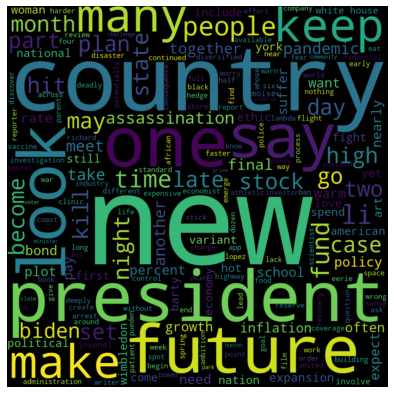

In [69]:
# wordlist generieren und erstmals anzeigen:
wordcloud_erstellen_für(nyt_text)

# 4. Ein kurzes abschließendes Fazit

Zum Schluss soll kurz nochmals zusammengefasst werden, was in vorliegendem Portfolio getan wurde und welche Erkenntnisse dadurch zutage gefördert werden konnten. Ebenso wird reflektiert, wie eine zukünftige Verbesserung des Scraping-Projektes möglich wäre.